<a href="https://colab.research.google.com/github/VishalShah1999/Visulization_ML/blob/main/HW4_Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4
## Dimensionality Reduction

In this homework, you will be using the [FIFA 2022 Dataset](https://drive.google.com/file/d/199NAatT2K0nxBWxRqh08xv0dmfFitSyv/view?usp=sharing), which is a `.csv` where each row is a player in the FIFA 2022 video game. Each player is described by a variety of attributes, like crossing ability, stamina, etc. Each attribute is described by a "grade". The data contains the 500 most valuable players in the game.

The list of attributes is `['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Dribbling', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Reactions', 'ShotPower', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Penalties', 'StandingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']`. Consider these the features. You will need to use these for PCA and t-SNE.

Start by uploading the `fifa.csv` to the notebook. Then run the code below, which downloads the player photos.

If there is code that requires a random seed (for example, t-SNE) please set it to `2022`.

In [1]:
### DO NOT EDIT! ###

import pandas as pd
import requests
import time

from tqdm import tqdm

fifa = pd.read_csv("fifa.csv")  # Make sure you upload the csv

images = []
for i, row in tqdm(fifa.iterrows()):
     resp = requests.get(row["Photo"])
     with open(str(row["ID"]) + ".png", "wb") as f:
       f.write(resp.content)
     images.append("/content/" + str(row["ID"]) + ".png")

500it [00:41, 12.08it/s]


In [2]:
import base64, io, IPython
from PIL import Image as PILImage

imgCode = []

for imgPath in images:
    image = PILImage.open(imgPath)
    output = io.BytesIO()    
    image.save(output, format='PNG')
    encoded_string = "data:image/png;base64,"+base64.b64encode(output.getvalue()).decode()
    imgCode.append(encoded_string)

fifa["image"] = imgCode

### Step 1: Preprocessing

Create a new variable, `Position`, and group the following positions (found in the `Best Position` feature) together:

LB, RB, LWB, RWB - Wing Back

RW, LW, RM, LM - Winger

CAM, CDM, CM - Central Midfielder

CF, ST - Striker

CB - Central Defender

GK - Goalkeeper

Below is a diagram of the soccer positions and their groupings.

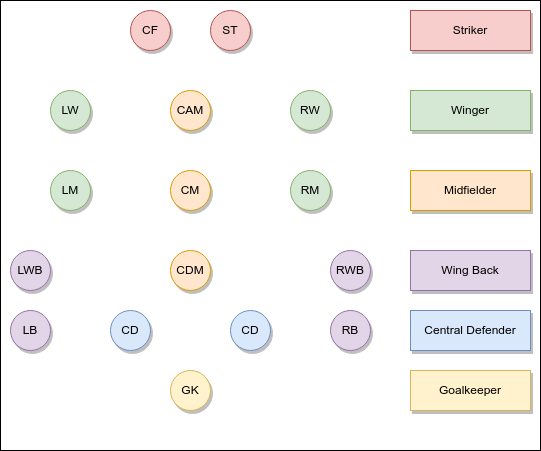

In [131]:
# code for step 1 here
fifa_temp = fifa.copy()

In [126]:
fifa_temp = fifa_temp.groupby(by=["Best Position"])['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Dribbling', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Reactions', 'ShotPower', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Penalties', 'StandingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'].sum()
fifa_temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Crossing,Finishing,HeadingAccuracy,ShortPassing,Dribbling,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Reactions,ShotPower,Stamina,Strength,LongShots,Aggression,Penalties,StandingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
Best Position,,,,,,,,,,,,,,,,,,,,,,,
CAM,6841.0,6908.0,5010.0,7402.0,7643.0,6472.0,6831.0,7620.0,7286.0,7039.0,7127.0,7098.0,6937.0,5684.0,6975.0,5511.0,6317.0,4600.0,976.0,927.0,1030.0,981.0,973.0
CB,4409.0,3340.0,6758.0,6353.0,5180.0,3393.0,5968.0,5977.0,5438.0,6023.0,6624.0,5213.0,6130.0,7062.0,3661.0,6847.0,4053.0,6994.0,860.0,875.0,922.0,874.0,870.0
CDM,2338.0,2118.0,2287.0,2893.0,2640.0,2059.0,2801.0,2816.0,2393.0,2341.0,2828.0,2645.0,3028.0,2691.0,2421.0,2925.0,2141.0,2871.0,334.0,377.0,390.0,362.0,353.0
CF,524.0,575.0,474.0,567.0,588.0,518.0,503.0,598.0,539.0,523.0,577.0,580.0,518.0,448.0,550.0,454.0,579.0,297.0,58.0,65.0,64.0,67.0,54.0
CM,4274.0,4054.0,3619.0,4911.0,4677.0,4097.0,4788.0,4854.0,4010.0,3944.0,4679.0,4597.0,4801.0,4179.0,4450.0,4340.0,3824.0,4414.0,620.0,581.0,587.0,587.0,582.0
GK,405.0,368.0,412.0,991.0,460.0,396.0,916.0,653.0,1203.0,1204.0,2112.0,1521.0,1018.0,1850.0,406.0,779.0,662.0,397.0,2219.0,2148.0,2024.0,2184.0,2275.0
LB,1698.0,1159.0,1405.0,1641.0,1598.0,1228.0,1482.0,1639.0,1687.0,1677.0,1658.0,1458.0,1730.0,1399.0,1275.0,1518.0,1147.0,1643.0,229.0,194.0,224.0,197.0,222.0
LM,1480.0,1376.0,982.0,1468.0,1588.0,1331.0,1343.0,1554.0,1623.0,1552.0,1477.0,1466.0,1452.0,1204.0,1371.0,1184.0,1252.0,910.0,199.0,203.0,191.0,200.0,211.0
LW,847.0,872.0,656.0,881.0,927.0,713.0,793.0,917.0,941.0,912.0,878.0,821.0,843.0,642.0,829.0,608.0,797.0,409.0,115.0,97.0,123.0,121.0,105.0


In [122]:
fifa_temp = fifa_temp.groupby(by=[''])

In [123]:
fifa_temp.head()

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Dribbling,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Reactions,ShotPower,Stamina,Strength,LongShots,Aggression,Penalties,StandingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
Best Position,,,,,,,,,,,,,,,,,,,,,,,
CAM,6841.0,6908.0,5010.0,7402.0,7643.0,6472.0,6831.0,7620.0,7286.0,7039.0,7127.0,7098.0,6937.0,5684.0,6975.0,5511.0,6317.0,4600.0,976.0,927.0,1030.0,981.0,973.0
CB,4409.0,3340.0,6758.0,6353.0,5180.0,3393.0,5968.0,5977.0,5438.0,6023.0,6624.0,5213.0,6130.0,7062.0,3661.0,6847.0,4053.0,6994.0,860.0,875.0,922.0,874.0,870.0
CDM,2338.0,2118.0,2287.0,2893.0,2640.0,2059.0,2801.0,2816.0,2393.0,2341.0,2828.0,2645.0,3028.0,2691.0,2421.0,2925.0,2141.0,2871.0,334.0,377.0,390.0,362.0,353.0
CF,524.0,575.0,474.0,567.0,588.0,518.0,503.0,598.0,539.0,523.0,577.0,580.0,518.0,448.0,550.0,454.0,579.0,297.0,58.0,65.0,64.0,67.0,54.0
CM,4274.0,4054.0,3619.0,4911.0,4677.0,4097.0,4788.0,4854.0,4010.0,3944.0,4679.0,4597.0,4801.0,4179.0,4450.0,4340.0,3824.0,4414.0,620.0,581.0,587.0,587.0,582.0
GK,405.0,368.0,412.0,991.0,460.0,396.0,916.0,653.0,1203.0,1204.0,2112.0,1521.0,1018.0,1850.0,406.0,779.0,662.0,397.0,2219.0,2148.0,2024.0,2184.0,2275.0
LB,1698.0,1159.0,1405.0,1641.0,1598.0,1228.0,1482.0,1639.0,1687.0,1677.0,1658.0,1458.0,1730.0,1399.0,1275.0,1518.0,1147.0,1643.0,229.0,194.0,224.0,197.0,222.0
LM,1480.0,1376.0,982.0,1468.0,1588.0,1331.0,1343.0,1554.0,1623.0,1552.0,1477.0,1466.0,1452.0,1204.0,1371.0,1184.0,1252.0,910.0,199.0,203.0,191.0,200.0,211.0
LW,847.0,872.0,656.0,881.0,927.0,713.0,793.0,917.0,941.0,912.0,878.0,821.0,843.0,642.0,829.0,608.0,797.0,409.0,115.0,97.0,123.0,121.0,105.0


In [ ]:
fifa_temp = fifa_temp.groupby(by)

In [74]:
top_1000 = fifa_temp.sort_values("Best Position").reset_index().head(1000)

In [75]:
top_1000 = top_1000.groupby(by='Best Position')

KeyError: ignored

In [76]:
top_1000.head()

,index,ID,Name,Photo,Value,Crossing,Finishing,HeadingAccuracy,ShortPassing,Dribbling,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Reactions,ShotPower,Stamina,Strength,LongShots,Aggression,Penalties,StandingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,image
0,223,224389,J. Larsson,https://cdn.sofifa.com/players/224/389/22_60.png,21500000,68.0,78.0,64.0,80.0,80.0,73.0,68.0,78.0,85.0,84.0,75.0,80.0,78.0,69.0,82.0,72.0,65.0,15.0,16.0,7.0,13.0,12.0,12.0,CAM,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
1,88,243812,Rodrygo,https://cdn.sofifa.com/players/243/812/22_60.png,38500000,71.0,80.0,62.0,74.0,84.0,73.0,60.0,80.0,88.0,86.0,76.0,71.0,81.0,42.0,71.0,54.0,74.0,36.0,9.0,8.0,12.0,8.0,5.0,CAM,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
2,288,226766,Daniel Podence,https://cdn.sofifa.com/players/226/766/22_60.png,18500000,66.0,67.0,42.0,75.0,86.0,42.0,70.0,82.0,94.0,86.0,77.0,66.0,75.0,30.0,57.0,67.0,63.0,30.0,14.0,14.0,8.0,7.0,15.0,CAM,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
3,86,238359,21 Wendel,https://cdn.sofifa.com/players/238/359/21_60.png,39500000,67.0,67.0,57.0,85.0,81.0,64.0,77.0,80.0,76.0,80.0,78.0,86.0,82.0,68.0,84.0,69.0,66.0,75.0,14.0,5.0,13.0,6.0,7.0,CAM,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
4,285,212404,F. Bernardeschi,https://cdn.sofifa.com/players/212/404/22_60.png,18500000,81.0,61.0,53.0,82.0,85.0,80.0,71.0,84.0,79.0,79.0,70.0,80.0,70.0,69.0,82.0,50.0,82.0,59.0,14.0,15.0,10.0,13.0,12.0,CAM,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."


In [50]:
fifa_temp = fifa_temp.drop(columns=['image', 'Photo', 'Name'])

In [51]:
fifa_temp = fifa_temp.rename(columns={'Best Position': 'Best_Position'})
fifa_temp.head()

,ID,Value,Crossing,Finishing,HeadingAccuracy,ShortPassing,Dribbling,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Reactions,ShotPower,Stamina,Strength,LongShots,Aggression,Penalties,StandingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best_Position
0,239085,137500000,47.0,94.0,69.0,77.0,78.0,62.0,51.0,85.0,82.0,94.0,88.0,94.0,82.0,93.0,87.0,85.0,76.0,43.0,7.0,14.0,13.0,11.0,7.0,ST
1,202126,129500000,80.0,94.0,86.0,85.0,83.0,65.0,86.0,85.0,65.0,74.0,92.0,91.0,83.0,85.0,86.0,80.0,91.0,36.0,8.0,10.0,11.0,14.0,11.0,ST
2,192985,125500000,94.0,82.0,55.0,94.0,88.0,83.0,93.0,91.0,76.0,76.0,91.0,91.0,89.0,74.0,91.0,76.0,83.0,65.0,15.0,13.0,5.0,10.0,13.0,CM
3,188545,119500000,71.0,95.0,90.0,85.0,85.0,85.0,70.0,88.0,77.0,79.0,93.0,90.0,76.0,86.0,87.0,81.0,90.0,42.0,15.0,6.0,12.0,8.0,10.0,ST
4,230621,119500000,12.0,12.0,12.0,36.0,28.0,14.0,34.0,30.0,50.0,55.0,85.0,59.0,34.0,72.0,18.0,30.0,24.0,14.0,91.0,83.0,79.0,85.0,90.0,GK


In [52]:
df2 = fifa_temp.groupby(by=["Best_Position"])

In [54]:
df2.insull().sum()

AttributeError: ignored

### Step 2.1: PCA

Using the list of attributes above, reduce the dimensionality of the data using 2 principal components.

Plot the first and second components using `altair`. Color each point based on its grouping from Step 1, and make sure the tooltip for each point contains the player name, position and photo (use the `image` feature created in the first two code blocks).

What groupings of players are most directly visible?

In [ ]:
# code here

### Step 2.2: PCA (no Goalkeepers)

Now, remove the goalkeepers from the data set, and re-run PCA. What does the first principal component seem to indicate (as you scan over the range of the 1st principal component, what relationship do you see?)

In [ ]:
# code here

### Step 3.1: t-SNE

Using the t-SNE function from `sklearn`, create plot the results of using 2 components with the rest of the parameters set to the default. Set the random state to `2022`.

Be sure to plot in the same way as you did in 2.1 and 2.2 (using the same color indications, tooltips, etc.)

What relationships do you see in the t-SNE output?

In [ ]:
# code here

### Step 3.2: t-SNE (only central midfielders)

Now, do the same as above but only for central midfielders. This time, instead of indicating the broad position group in your chart (which would be "Midfielders" in this case), indicate the specific position through color, like "CAM", "CDM" and so on.

What relationships do you see in the t-SNE output?

In [ ]:
# code here

### Step 3.3: t-SNE Parameters

Read [this Distill](https://distill.pub/2016/misread-tsne/) on t-SNE parameters.

The `perplexity` parameter is described in the Distill as

```"...which says (loosely) how to balance attention between local and global aspects of your data. The parameter is, in a sense, a guess about the number of close neighbors each point has."```

Create two plots, one where you select a perplexity such that the points appear more tightly clustered (many small, tight clusters), and another where they are less tightly clustered (larger, less clear clusters). The default perplexity is `30`, so consider this the baseline. Be sure to set the random seed to 2022 and use all of the data.

In [ ]:
# code here

### Step 3.4 t-SNE Questions

Answer the following questions:

(1) What do cluster sizes mean in t-SNE (e.g., one cluster with a large standard deviation vs. another with a tighter distribution)?

(2) Do distances between clusters or points mean something?

(3) What are some advantages of t-SNE over PCA?

(4) What are some disadvantages of t-SNE over PCA?